Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

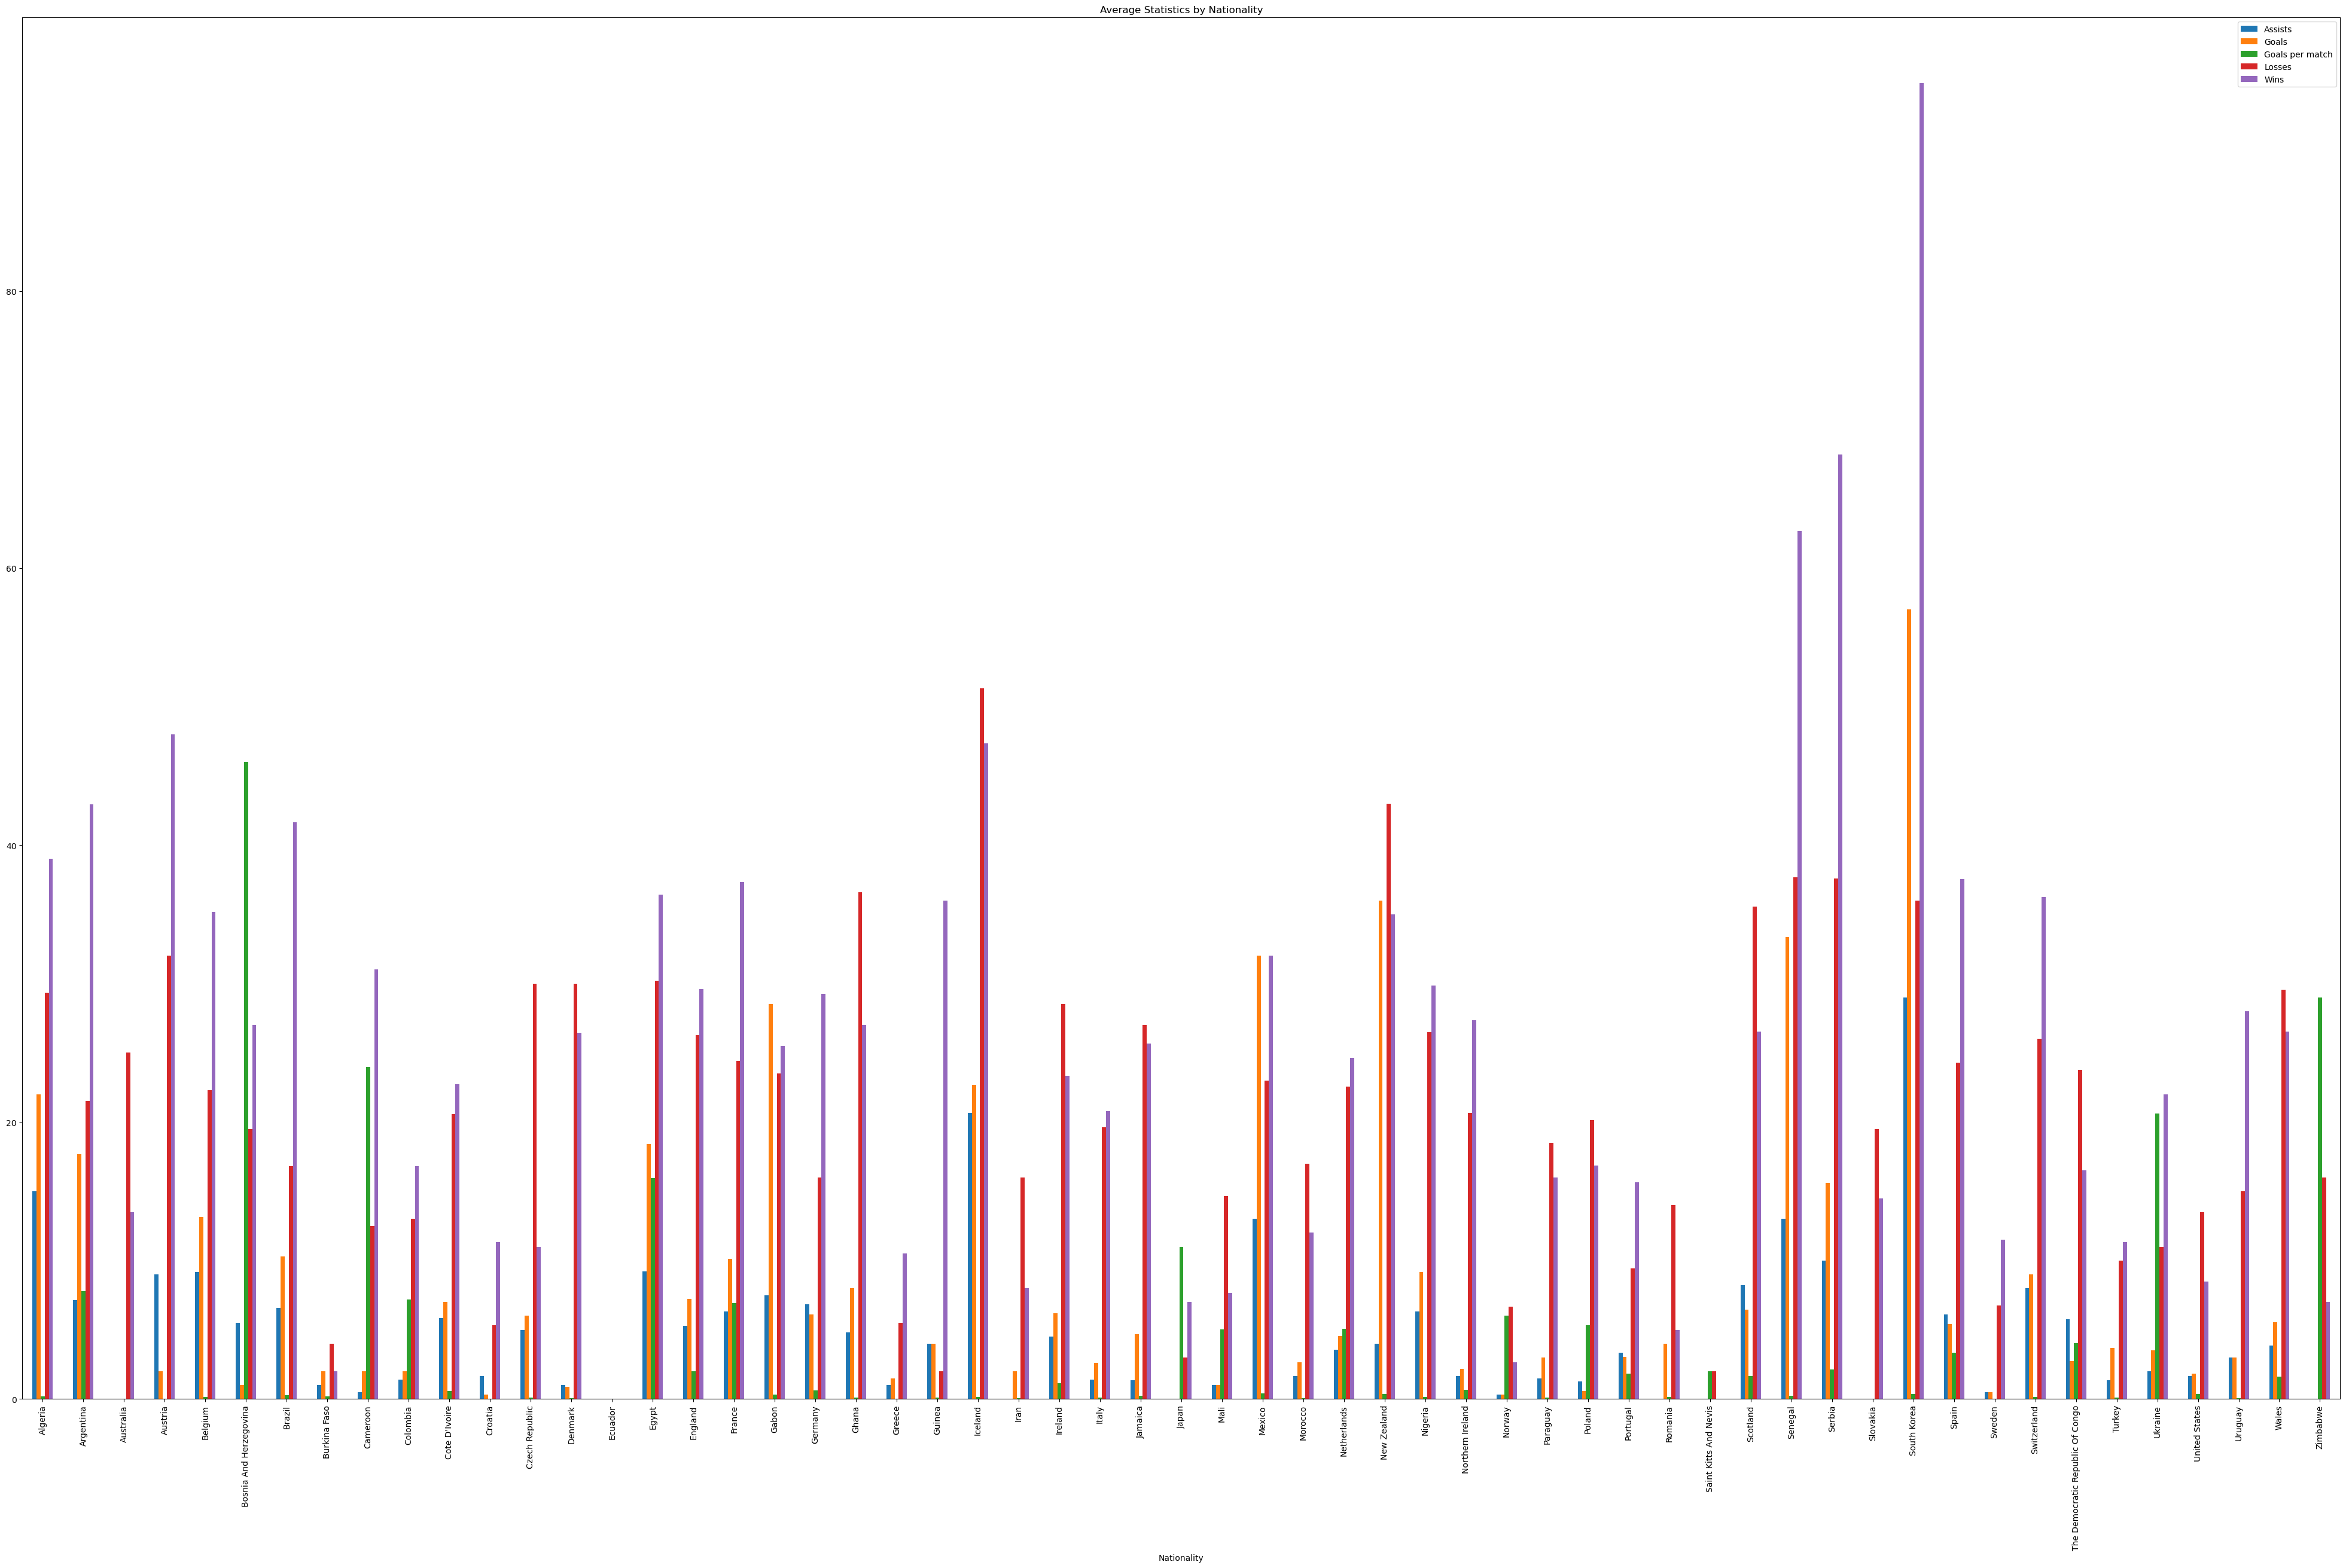

[ 1. 33. 13.  2.  3.  4.  5. 16. 20. 21. 23. 31.  6. 10. 11. 15. 25. 28.
 29. 32. 34.  7.  8.  9. 14. 19. 24. 30. 35. 12. 26. 18. 22. 27. 17. 41.
 39. nan 52. 50. 58. 49. 53. 55. 42. 37. 45. 44. 40. 47. 36. 43. 46. 38.
 62. 73. 66. 76. 72. 59. 67. 69. 82. 48. 71. 54. 56. 57.]
                       Name  Jersey Number               Club    Position  \
57          Bertrand Traoré            NaN        Aston-Villa     Forward   
127           Juan Castillo            NaN            Chelsea    Defender   
145         Nathan Ferguson            NaN     Crystal-Palace    Defender   
280            Cengiz Ünder            NaN     Leicester-City  Midfielder   
322            Zack Steffen            NaN    Manchester-City  Goalkeeper   
332         Patrick Roberts            NaN    Manchester-City  Midfielder   
348               Lee Grant            NaN  Manchester-United  Goalkeeper   
473  Cameron Carter-Vickers            NaN  Tottenham-Hotspur    Defender   

       Nationality   Age  App

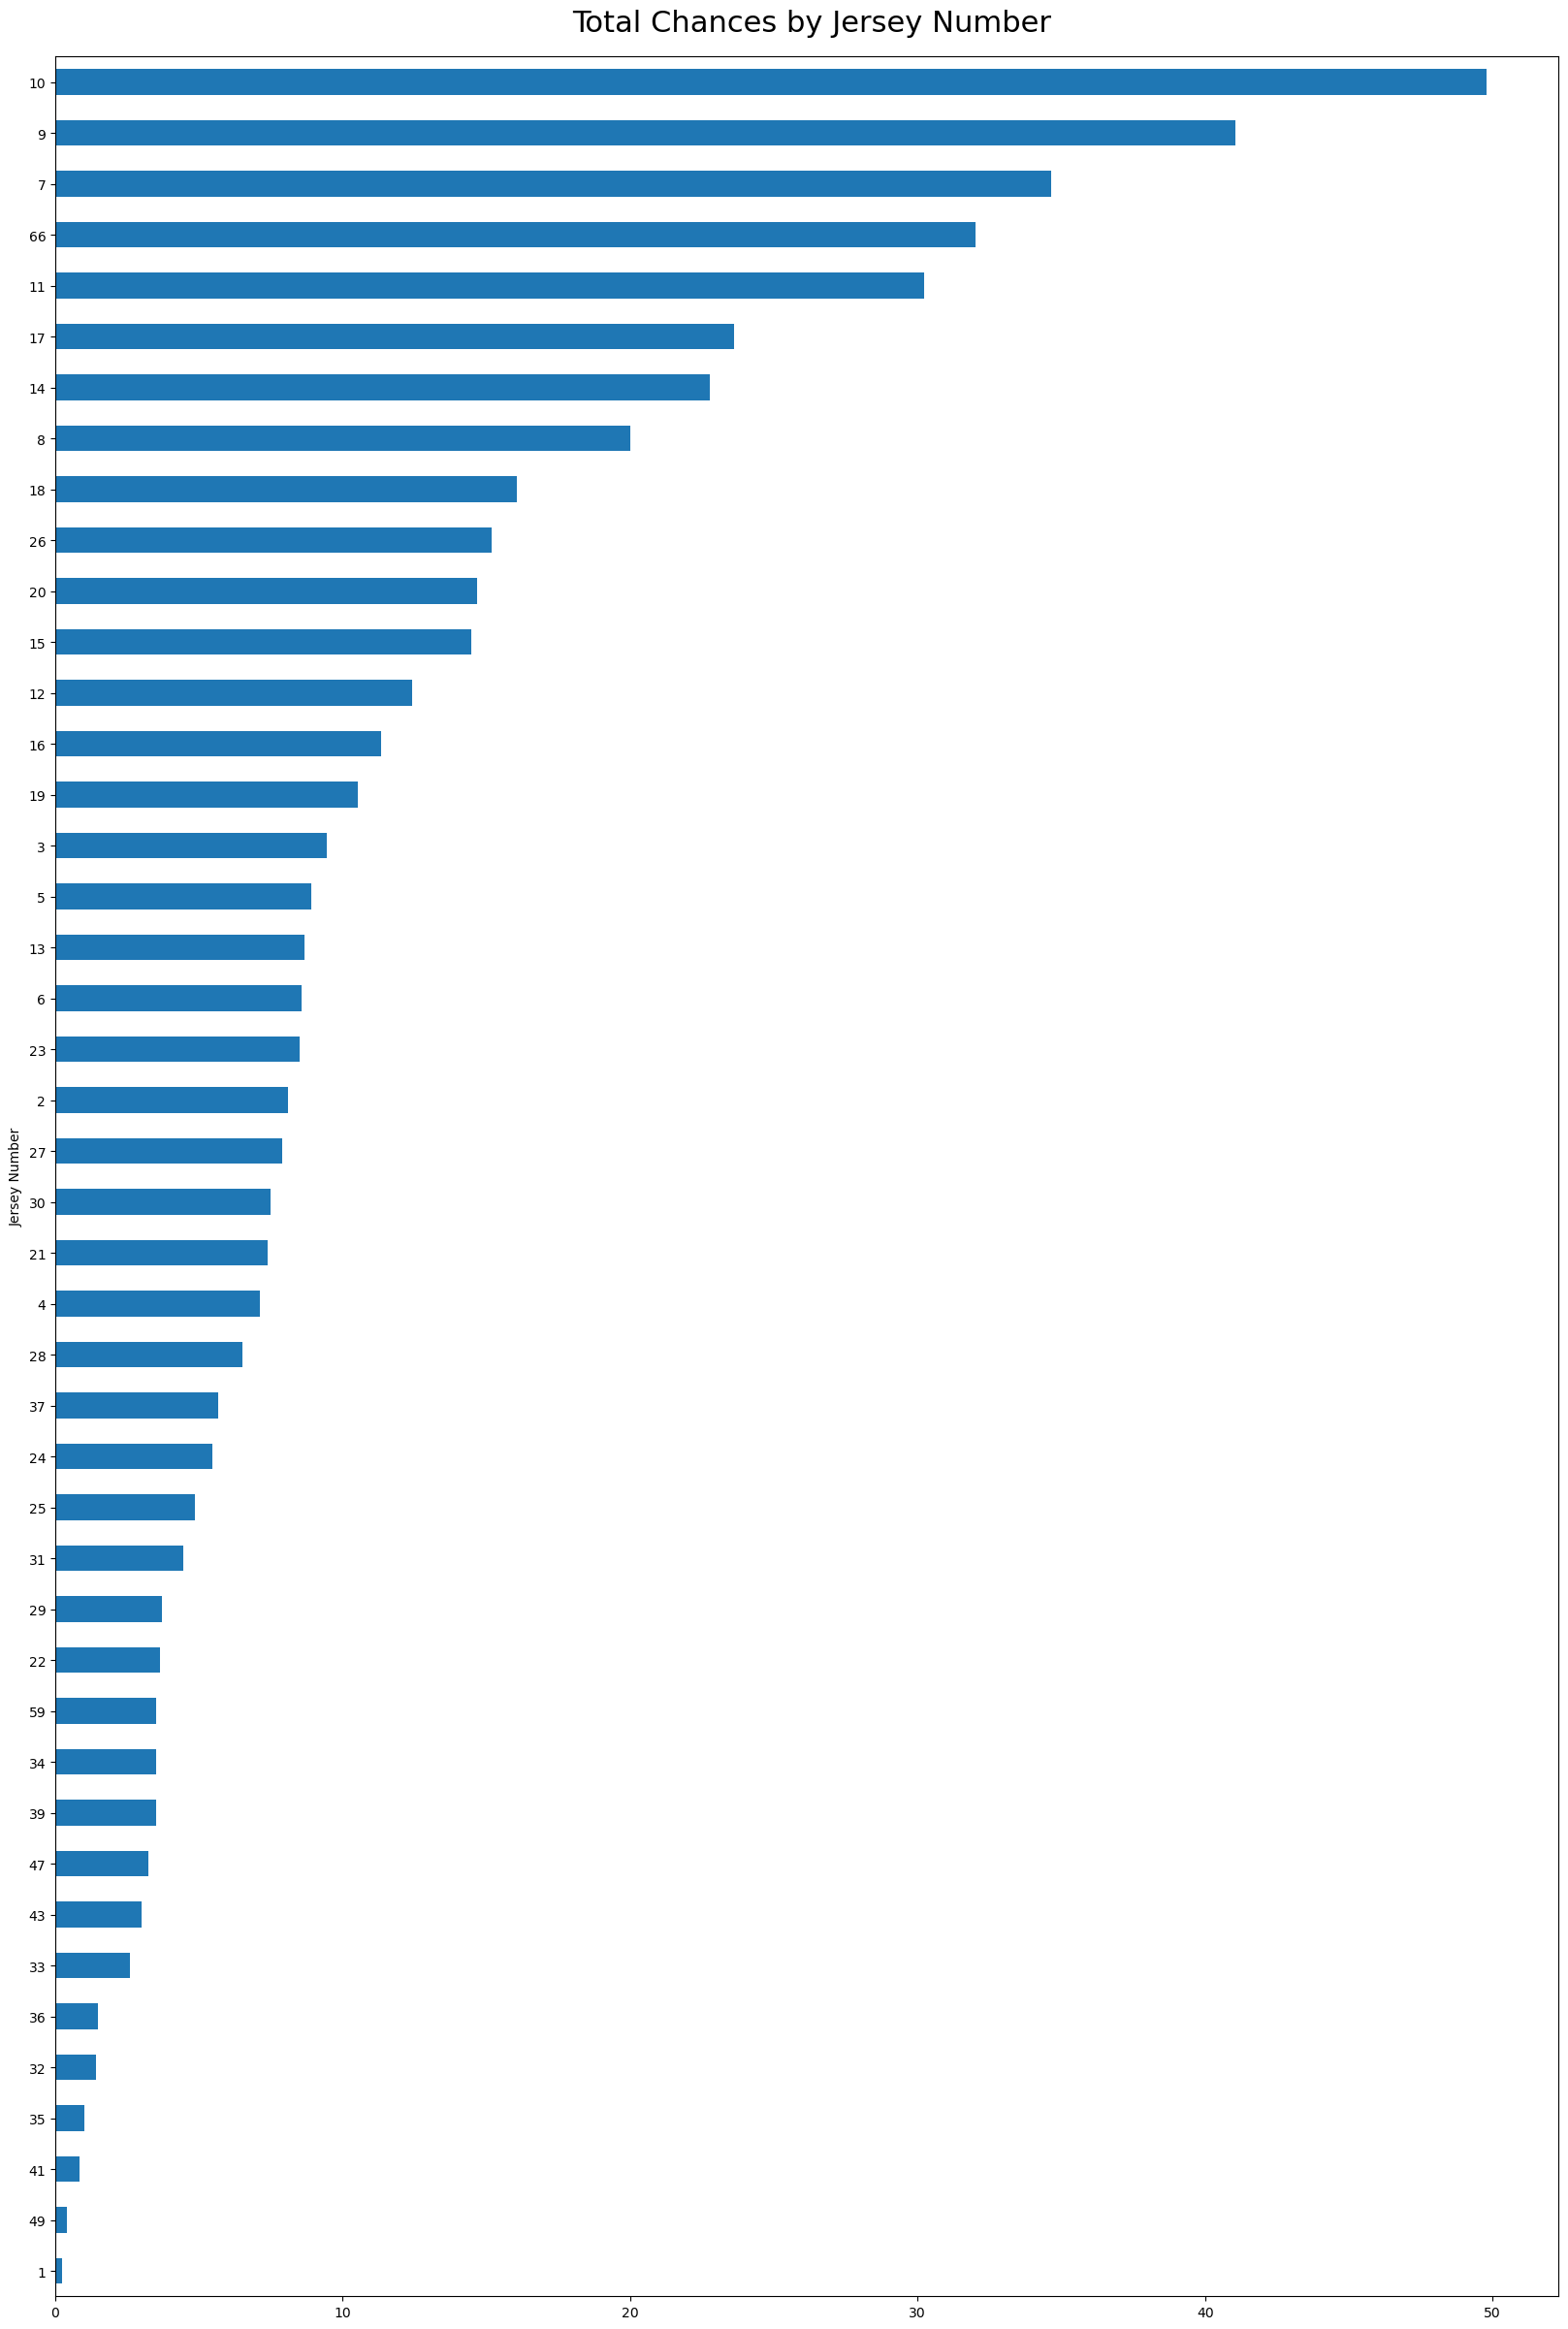

count    109.000000
mean      30.247706
std       41.275756
min        0.000000
25%        2.000000
50%       11.000000
75%       45.000000
max      226.000000
Name: Total chances, dtype: float64
                Name  Jersey Number               Club Position Nationality  \
344    Sergio Agüero             10    Manchester-City  Forward   Argentina   
489       Harry Kane             10  Tottenham-Hotspur  Forward     England   
281      Jamie Vardy              9     Leicester-City  Forward     England   
342  Raheem Sterling              7    Manchester-City  Forward     England   
198     Theo Walcott             11            Everton  Forward     England   

      Age  Appearances  Wins  Losses  Goals  ...  High Claims  Catches  \
344  32.0          263   177      44    180  ...          NaN      NaN   
489  27.0          212   120      48    144  ...          NaN      NaN   
281  33.0          213    86      77    105  ...          NaN      NaN   
342  25.0          260   161     

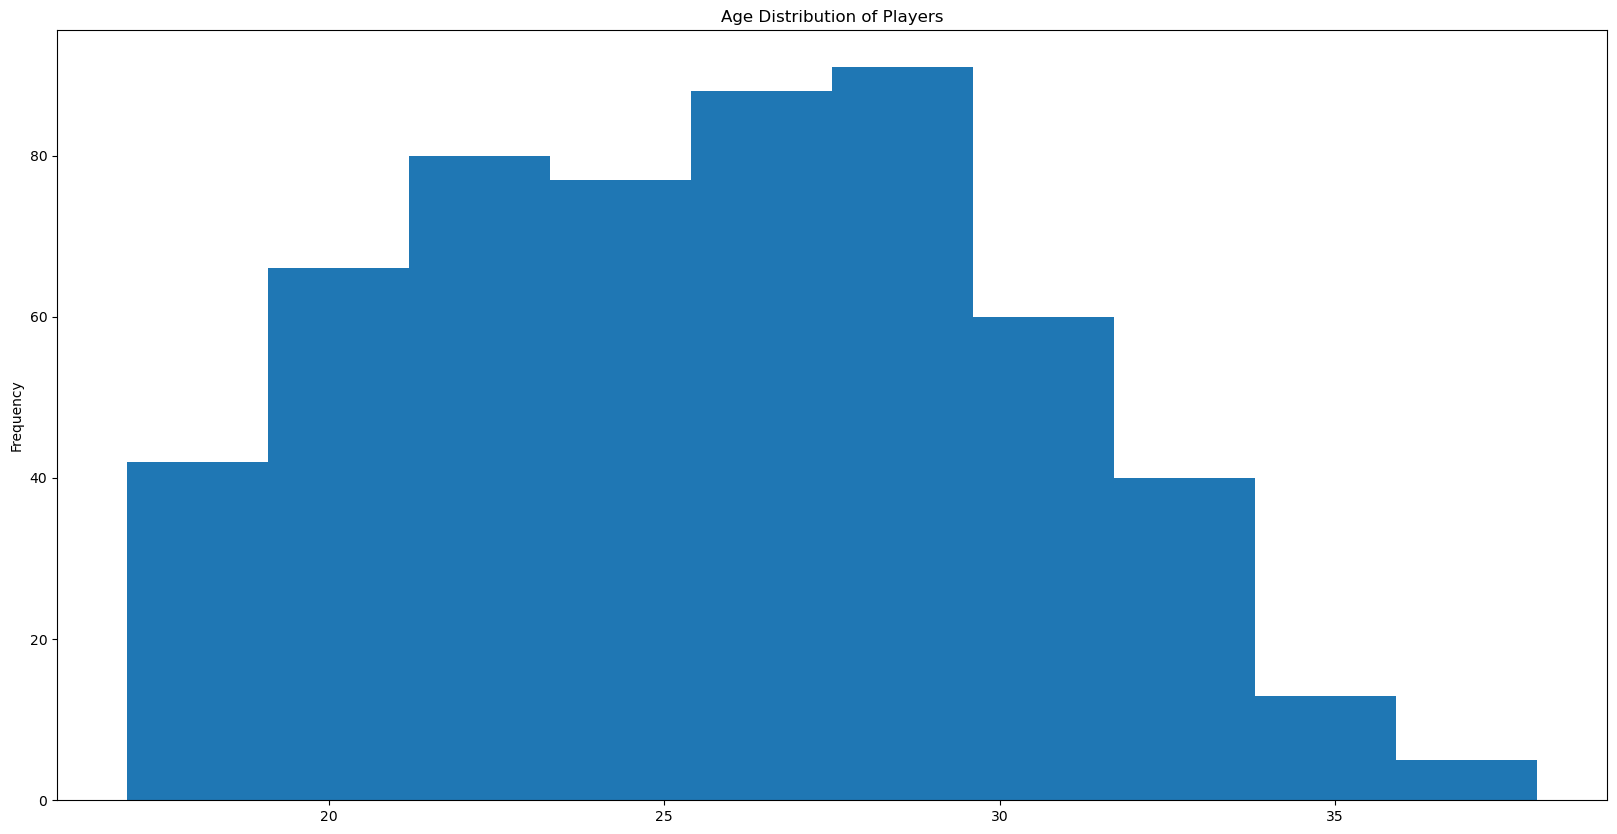

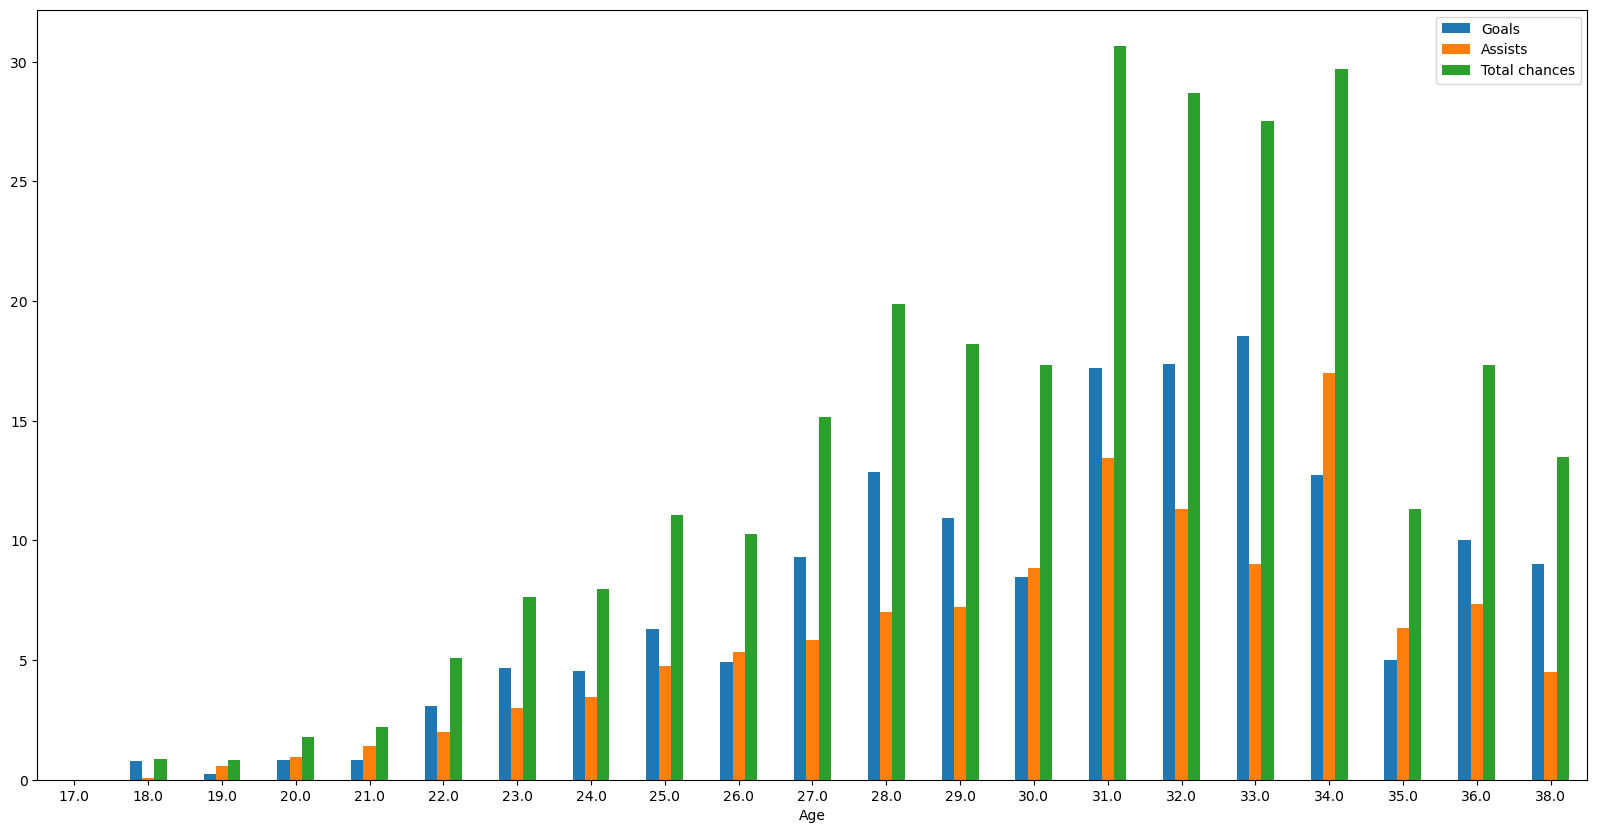

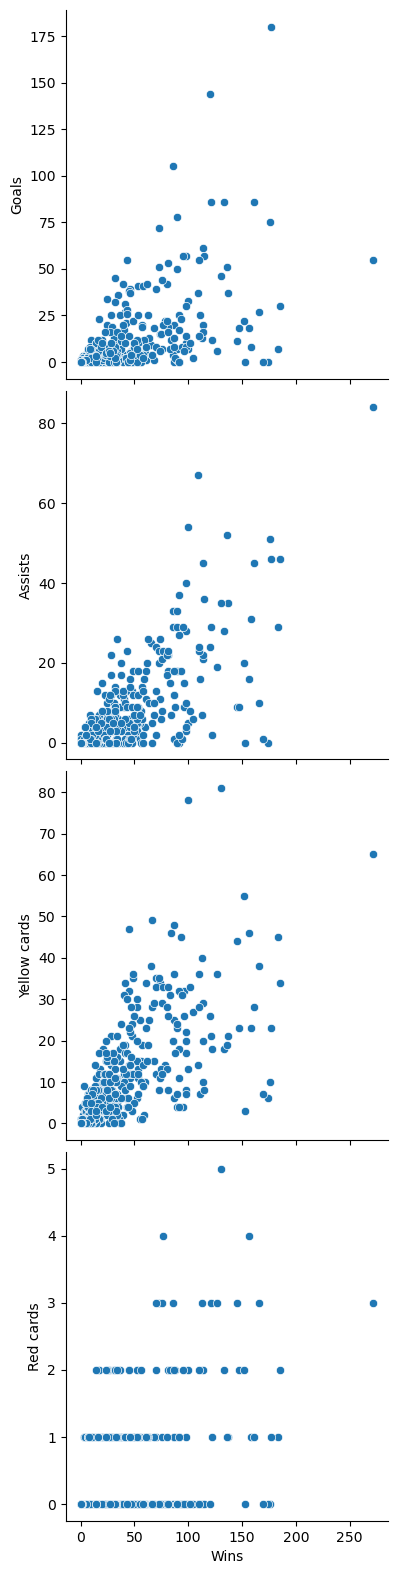

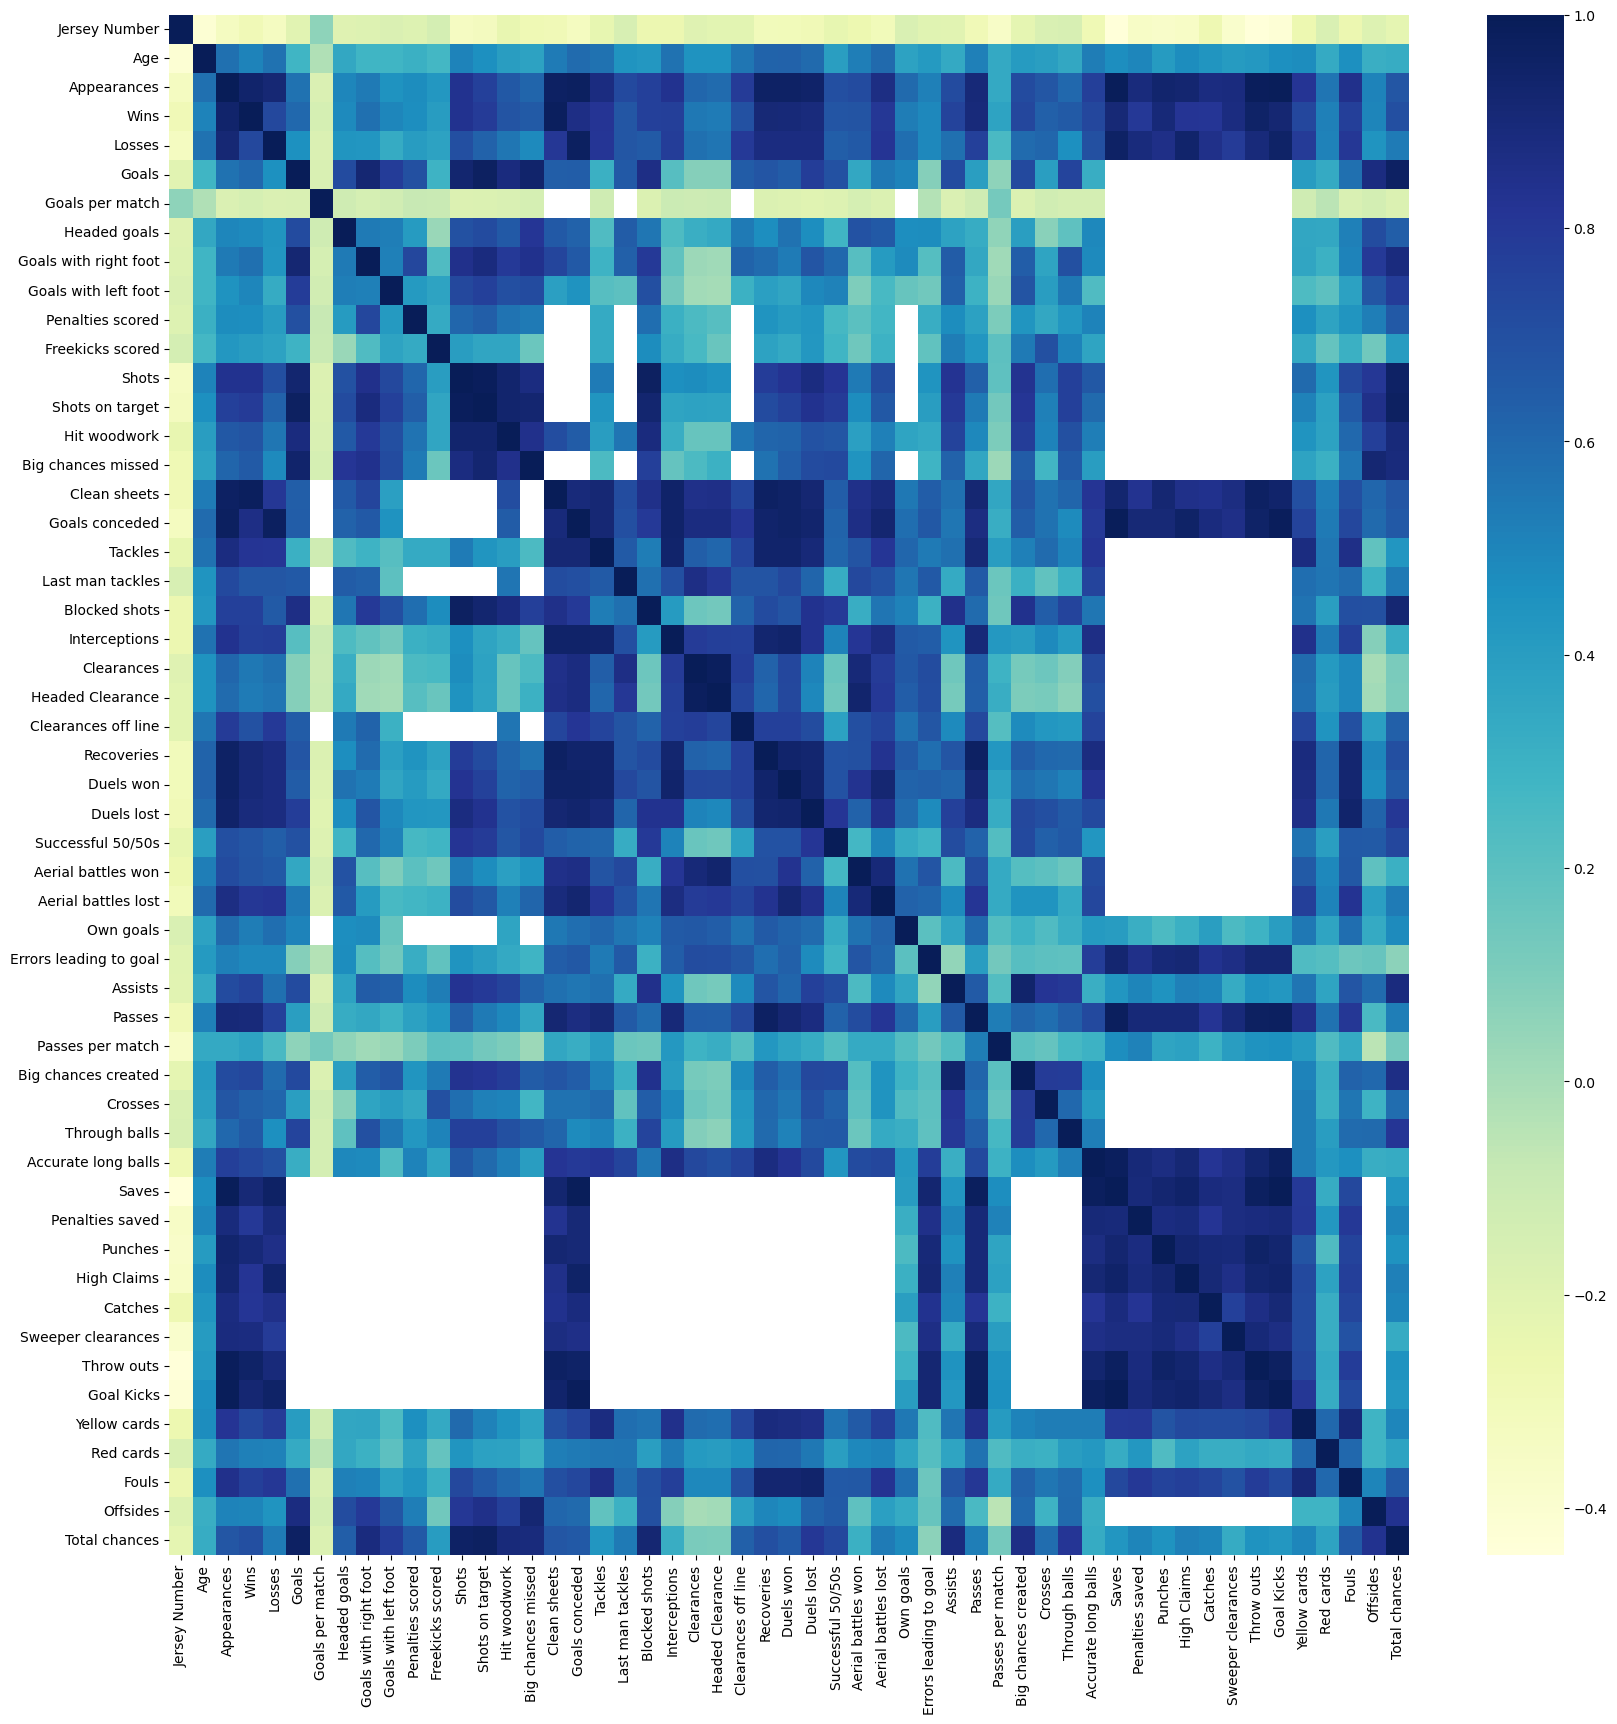

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据集
data = pd.read_csv(r'C:\Users\wyh\Desktop\dataset - 2020-09-24.csv')


# 显示数据的列名
print(data.columns)

# 显示数据的统计描述
print(data.describe())

# 显示数据集的详细信息（每列的数据类型和非空值的数量）
print(data.info())

# 显示数据的行数和列数
print(data.shape)

# 创建一个数据透视表，按国籍分类，并计算平均胜场、负场、进球数、场均进球和助攻
by_country = data.pivot_table(index=['Nationality'], values=['Wins', 'Losses', 'Goals', 'Goals per match', 'Assists'], aggfunc=np.mean)

# 以柱状图形式展示数据透视表
by_country.plot(kind='bar', figsize=(50,30), legend=True)
plt.title('Average Statistics by Nationality')  # 添加图表标题
plt.show()

# 检查球衣号码的唯一值
print(data['Jersey Number'].unique())

# 查找球衣号码为null的数据行
print(data[data['Jersey Number'].isnull()])

# 删除球衣号码为null的行
data = data.dropna(subset=['Jersey Number'])

# 将球衣号码的数据类型转换为整数
data['Jersey Number'] = data['Jersey Number'].astype(int)

# 计算总机会（进球+助攻）
data['Total chances'] = data['Goals'] + data['Assists']

# 按球衣号码分组，并计算每组的平均值
jersey_num_means = data.groupby('Jersey Number').agg(np.mean)

# 填充场均进球的缺失值为0
jersey_num_means['Goals per match'] = jersey_num_means['Goals per match'].fillna(0)

# 绘制有进球机会的球衣号码的水平柱状图
jersey_num_means['Total chances'][jersey_num_means['Total chances'] > 0].sort_values().plot(kind='barh', figsize=(20,30))
plt.text(x=18, y=44, s='Total Chances by Jersey Number', fontsize=22)  # 添加自定义文本
plt.show()

# 查看不同位置的球员数据
positions = data['Position'].unique()
goalkeeper_data = data[data['Position'] == 'Goalkeeper']
defender_data = data[data['Position'] == 'Defender']
mid_data = data[data['Position'] == 'Midfielder']
forward_data = data[data['Position'] == 'Forward']

# 描述前锋的总机会数据
print(forward_data['Total chances'].describe())

# 列出前5名前锋的总机会数据
print(forward_data.sort_values(by='Total chances', ascending=False)[:5])

# 绘制年龄分布直方图
data['Age'].plot(kind='hist', figsize=(20,10))
plt.title('Age Distribution of Players')  # 添加图表标题
plt.show()

# 按年龄分组，计算平均值，并绘制各年龄组的平均进球、助攻和总机会柱状图
age_groups = data.groupby('Age').mean()
age_groups[['Goals', 'Assists', 'Total chances']].plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0)  # 将x轴标签旋转0度
plt.show()

# 使用Seaborn绘制变量之间的散点图
sns.pairplot(data, x_vars='Wins', y_vars=['Goals', 'Assists', 'Yellow cards', 'Red cards'], height=4, aspect=1, kind='scatter')

# 创建一个热图显示数据的相关性矩阵
fig1, ax1 = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=False, ax=ax1)
plt.show()
